In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import SpectralClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
import time
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import NMF
from sklearn.decomposition import KernelPCA
from sklearn.manifold import MDS
import umap
plt.style.use('ggplot')

In [85]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [86]:
print(df.isnull().sum())
df = df.dropna()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [87]:
df.drop(columns=['ID','Z_CostContact', 'Z_Revenue'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [88]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df["Age"] = (df["Dt_Customer"].dt.year - df["Year_Birth"]).astype(int)
df.drop(columns=['Year_Birth','Dt_Customer'], inplace=True)

In [89]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
df['Accepted_Any_Campaign'] = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0).astype(int)
df['Total_Children'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [90]:
df["Education"] = df["Education"].replace({"Basic": "Undergraduate","2n Cycle": "Undergraduate","Graduation": "Graduate","Master": "Postgraduate","PhD": "Postgraduate"})

In [91]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Campaigns_Accepted,Accepted_Any_Campaign,Total_Children,Spent
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,55,0,0,0,1617
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,60,0,0,2,27
2,Graduate,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,48,0,0,0,776
3,Graduate,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,30,0,0,1,53
4,Postgraduate,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,33,0,0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Married,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,46,0,0,1,1341
2236,Postgraduate,Together,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,0,68,1,1,3,444
2237,Graduate,Divorced,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,0,33,1,1,0,1241
2238,Postgraduate,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,58,0,0,1,843


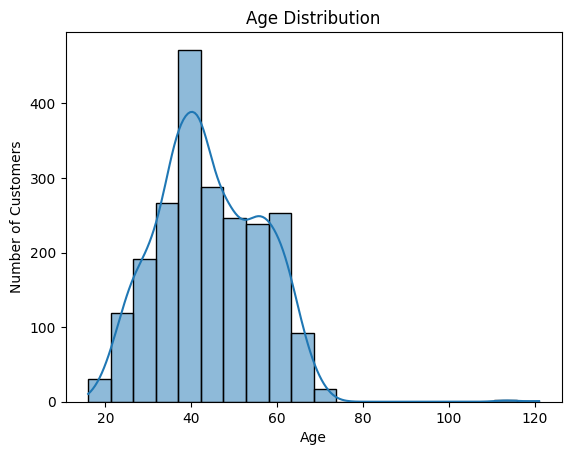

In [33]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

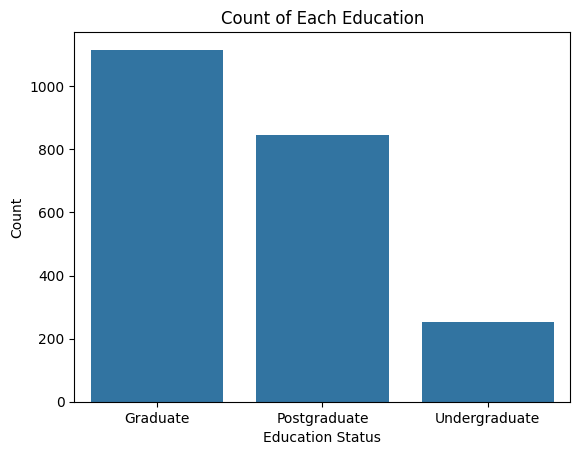

In [34]:
sns.countplot(x='Education', data=df)
plt.title('Count of Each Education')
plt.xlabel('Education Status')
plt.ylabel('Count')
plt.show()

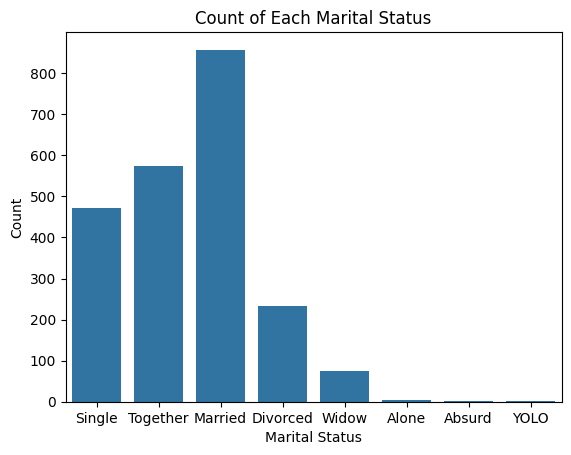

In [35]:
sns.countplot(x='Marital_Status', data=df)
plt.title('Count of Each Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [92]:
df["Living_With"] = df["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone","Divorced": "Alone", "Single": "Alone"})

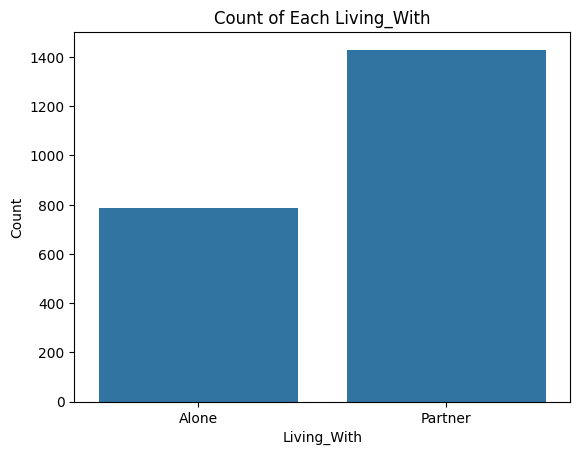

In [37]:
sns.countplot(x='Living_With', data=df)
plt.title('Count of Each Living_With')
plt.xlabel('Living_With')
plt.ylabel('Count')
plt.show()

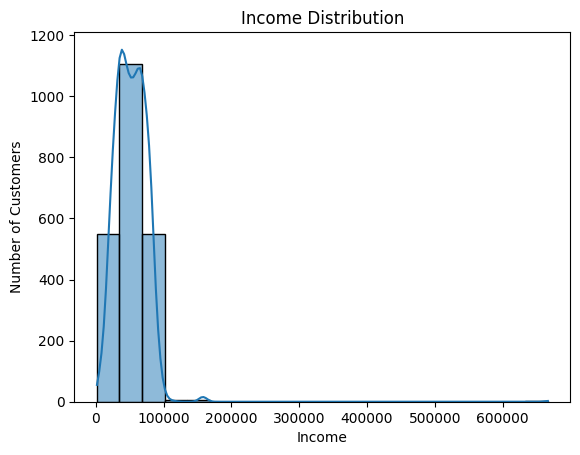

In [38]:
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

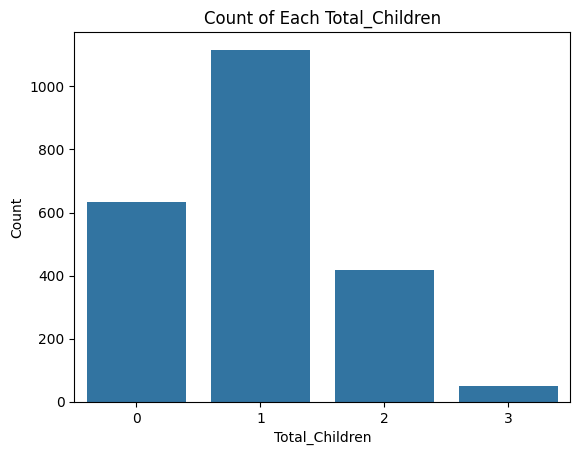

In [39]:
sns.countplot(x='Total_Children', data=df)
plt.title('Count of Each Total_Children')
plt.xlabel('Total_Children')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Income'>

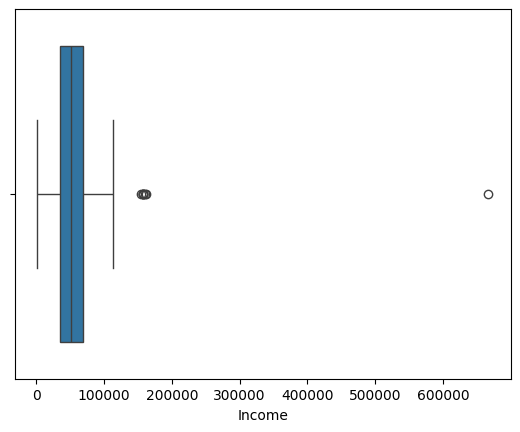

In [40]:
sns.boxplot(data=df,x="Income")

In [93]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + IQR*1.5
lower = Q1 - IQR*1.5
print(f'Upper: {upper}')
print(f'Lower: {lower}')

Upper: 118350.5
Lower: -14525.5


In [94]:
df = df[(df['Income']<upper) & (df['Income']>lower)]
df = df[(df["Age"]<90)]

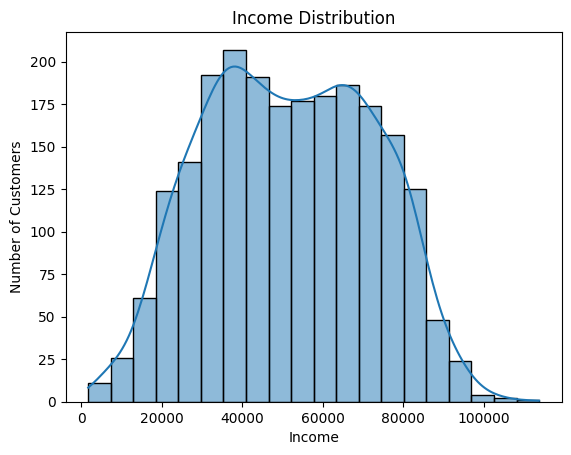

In [43]:
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education                 2205 non-null   object 
 1   Marital_Status            2205 non-null   object 
 2   Income                    2205 non-null   float64
 3   Kidhome                   2205 non-null   int64  
 4   Teenhome                  2205 non-null   int64  
 5   Recency                   2205 non-null   int64  
 6   MntWines                  2205 non-null   int64  
 7   MntFruits                 2205 non-null   int64  
 8   MntMeatProducts           2205 non-null   int64  
 9   MntFishProducts           2205 non-null   int64  
 10  MntSweetProducts          2205 non-null   int64  
 11  MntGoldProds              2205 non-null   int64  
 12  NumDealsPurchases         2205 non-null   int64  
 13  NumWebPurchases           2205 non-null   int64  
 14  NumCatalogPur

In [96]:
encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])
df['Living_With'] = encoder.fit_transform(df['Living_With'])

In [97]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Campaigns_Accepted,Accepted_Any_Campaign,Total_Children,Spent,Living_With
0,0,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,55,0,0,0,1617,0
1,0,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,60,0,0,2,27,0
2,0,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,48,0,0,0,776,1
3,0,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,30,0,0,1,53,1
4,1,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,33,0,0,1,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,3,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,46,0,0,1,1341,1
2236,1,5,64014.0,2,1,56,406,0,30,0,...,1,0,0,0,68,1,1,3,444,1
2237,0,2,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,33,1,1,0,1241,0
2238,1,5,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,58,0,0,1,843,1


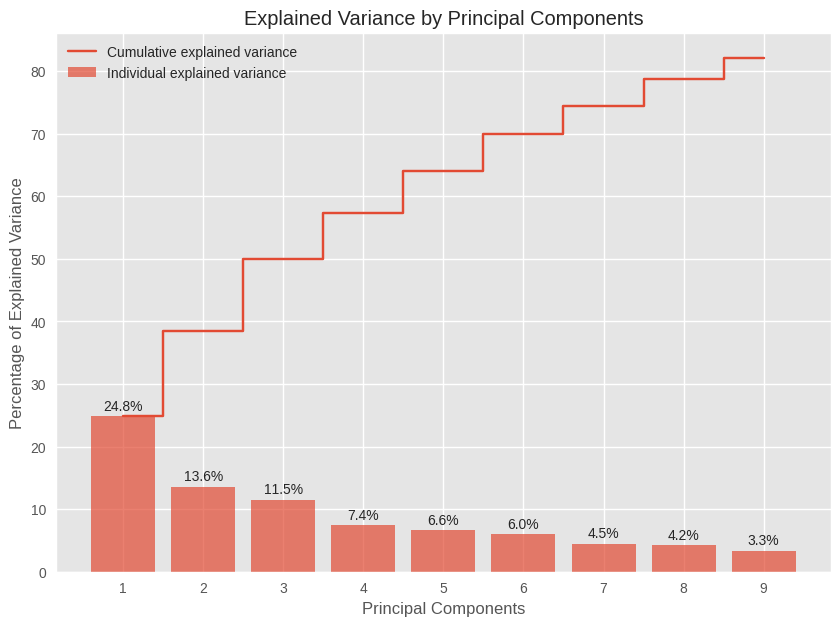

In [100]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=9)
principal_components = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_ * 100
cumulative_explained_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 7))
bars = plt.bar(range(1, 10), explained_variance, alpha=0.7, align='center', label='Individual explained variance')

for bar, variance in zip(bars, explained_variance):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{variance:.1f}%', ha='center', va='bottom')

plt.step(range(1, 10), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.xticks(ticks=range(1, 10), labels=[f'{i}' for i in range(1, 10)])
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()


In [99]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [42]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f'k={k}, Silhouette Score: {score}')

k=2, Silhouette Score: 0.3777030729349501
k=3, Silhouette Score: 0.4376259337035811
k=4, Silhouette Score: 0.418317268945471
k=5, Silhouette Score: 0.4208659066842452
k=6, Silhouette Score: 0.4272193283995037
k=7, Silhouette Score: 0.45889641303988477
k=8, Silhouette Score: 0.40045491182067955
k=9, Silhouette Score: 0.41705004018557706


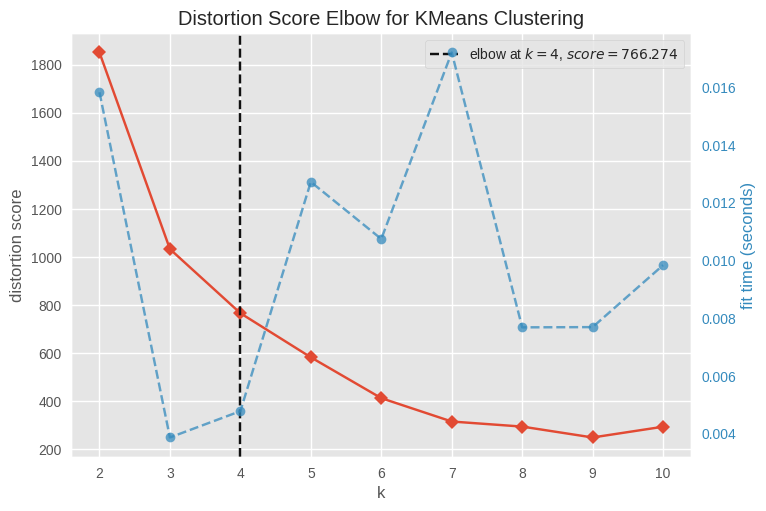

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
model_KM = KMeans()
visualizer = KElbowVisualizer(model_KM, k=10)


visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()

In [119]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster']= kmeans.fit_predict(X_pca)

In [120]:
cluster_summary_PCA = df.groupby('Cluster').mean()
print(cluster_summary_PCA)


         Education  Marital_Status        Income   Kidhome  Teenhome  \
Cluster                                                                
0         0.586006        3.696793  73821.507289  0.069971  0.338192   
1         0.668348        3.784363  37317.914250  0.752837  0.552333   
2         0.582090        3.583582  48113.556716  0.491045  0.516418   
3         0.558897        3.872180  66859.030075  0.062657  0.543860   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        48.402332  766.335277  46.551020       370.536443        70.696793   
1        49.365700   85.104666   6.045397        35.684741         8.583859   
2        49.367164  230.459701  24.608955       138.982090        34.574627   
3        48.220551  477.052632  52.556391       290.734336        72.761905   

         ...  Response        Age  Total_Campaigns_Accepted  \
Cluster  ...                 

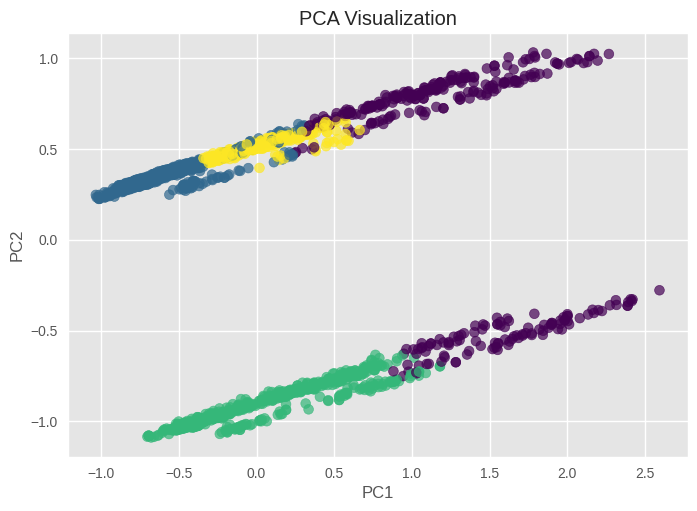

In [56]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7,c=df['Cluster'], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


<ipython-input-76-23e7560efe9b>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.7, cmap='viridis')


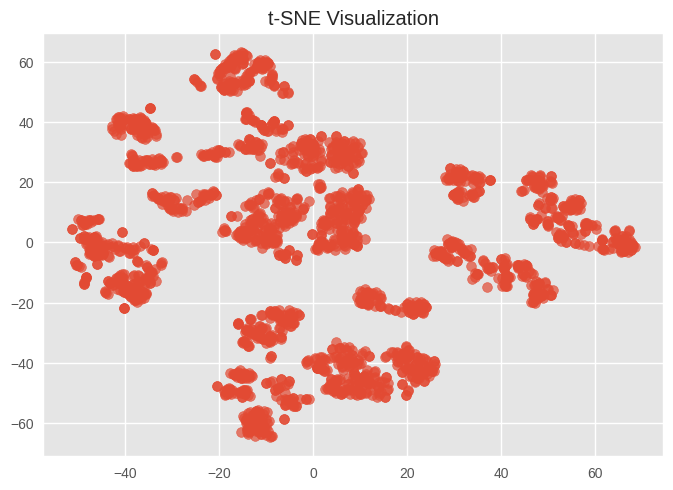

In [76]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(X_scaled)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.7, cmap='viridis')
plt.title('t-SNE Visualization')
plt.show()


In [31]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


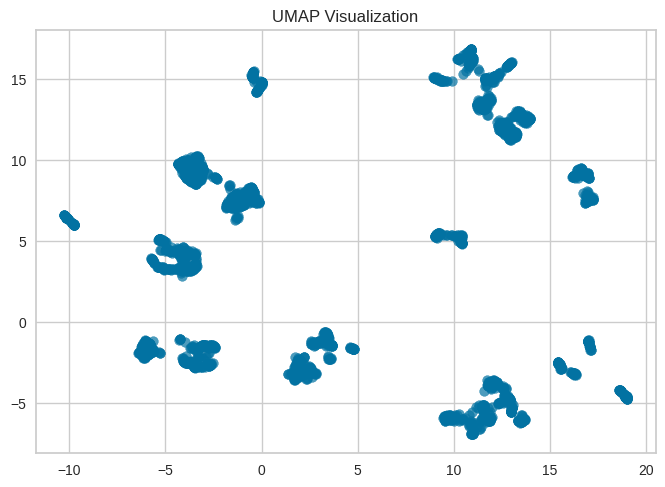

In [32]:
umap_data = umap.UMAP(n_components=2).fit_transform(X_scaled)

plt.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.7)
plt.title('UMAP Visualization')
plt.show()


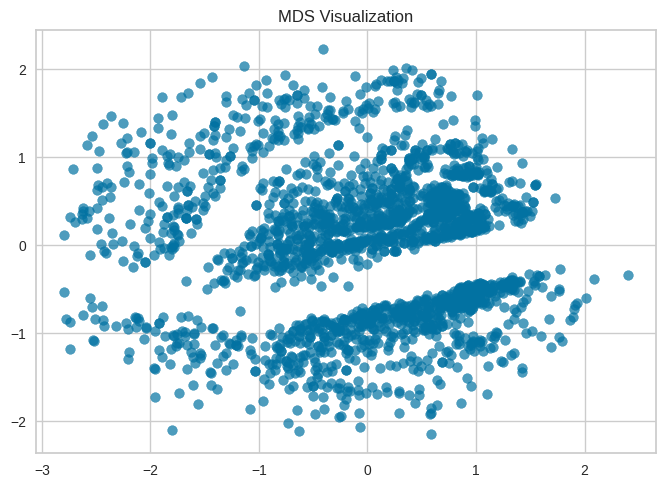

In [67]:
mds = MDS(n_components=2, random_state=42)
mds_data = mds.fit_transform(X_scaled)
plt.scatter(mds_data[:, 0], mds_data[:, 1], alpha=0.7)
plt.title('MDS Visualization')
plt.show()

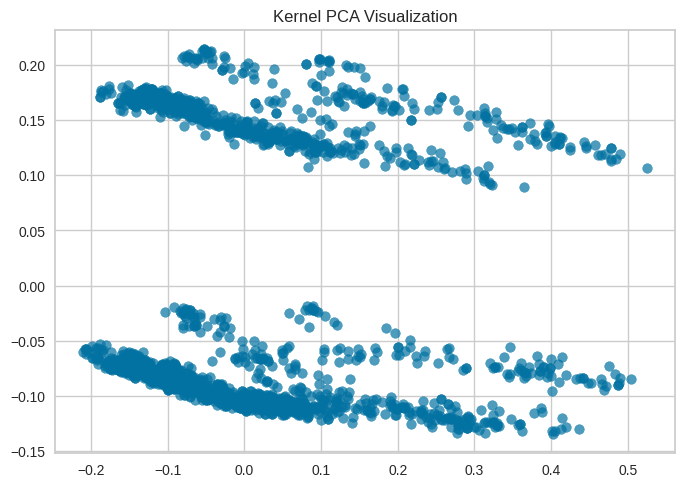

In [68]:
kpca = KernelPCA(n_components=2, kernel='rbf',fit_inverse_transform=True)
kpca_data = kpca.fit_transform(X_scaled)
plt.scatter(kpca_data[:, 0], kpca_data[:, 1], alpha=0.7)
plt.title('Kernel PCA Visualization')
plt.show()

In [106]:
nmf = NMF(n_components=2, random_state=42)
W = nmf.fit_transform(X_scaled)
H = nmf.components_

print(f"Reconstruction Error: {nmf.reconstruction_err_}")


Reconstruction Error: 51.38742951362443


In [108]:
df['NMF_Component_1'] = W[:, 0]
df['NMF_Component_2'] = W[:, 1]

In [83]:
H.shape

(3, 33)

In [110]:
feature_contributions = pd.DataFrame(H, columns=df.columns[:-2])
print(feature_contributions)


   Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0   2.172530        3.420382  2.212405  1.938378  2.180481  3.365849   
1   0.519224        1.203287  1.851337  0.000000  0.100565  1.011229   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp1  \
0  0.496257   0.342364         0.164165         0.363578  ...      0.000000   
1  1.582945   0.938099         0.782165         1.049171  ...      0.998329   

   AcceptedCmp2  Complain  Response       Age  Total_Campaigns_Accepted  \
0      0.000000  0.072052  0.000000  3.166277                  0.000000   
1      0.207313  0.002592  1.574335  1.189589                  1.011366   

   Accepted_Any_Campaign  Total_Children     Spent  Living_With  
0               0.000000        2.775809  0.553106     5.246996  
1               2.482736        0.000000  1.825374     0.830355  

[2 rows x 30 columns]


In [104]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Age,Total_Campaigns_Accepted,Accepted_Any_Campaign,Total_Children,Spent,Living_With,NMF_Component_1,NMF_Component_2,NMF_Component_3
0,0,4,58138.0,0,0,58,635,88,546,172,...,1,55,0,0,0,1617,0,0.008375,0.188373,0.071839
1,0,4,46344.0,1,1,38,11,1,6,2,...,0,60,0,0,2,27,0,0.000000,0.000000,0.202696
2,0,5,71613.0,0,0,26,426,49,127,111,...,0,48,0,0,0,776,1,0.111656,0.093857,0.073882
3,0,5,26646.0,1,0,26,11,4,20,10,...,0,30,0,0,1,53,1,0.102172,0.000000,0.107587
4,1,3,58293.0,1,0,94,173,43,118,46,...,0,33,0,0,1,422,1,0.101522,0.026121,0.166128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,3,61223.0,0,1,46,709,43,182,42,...,0,46,0,0,1,1341,1,0.103414,0.084572,0.108766
2236,1,5,64014.0,2,1,56,406,0,30,0,...,0,68,1,1,3,444,1,0.088668,0.097583,0.246280
2237,0,2,56981.0,0,0,91,908,48,217,32,...,0,33,1,1,0,1241,0,0.000240,0.232744,0.049940
2238,1,5,69245.0,0,1,8,428,30,214,80,...,0,58,0,0,1,843,1,0.107351,0.072186,0.142015


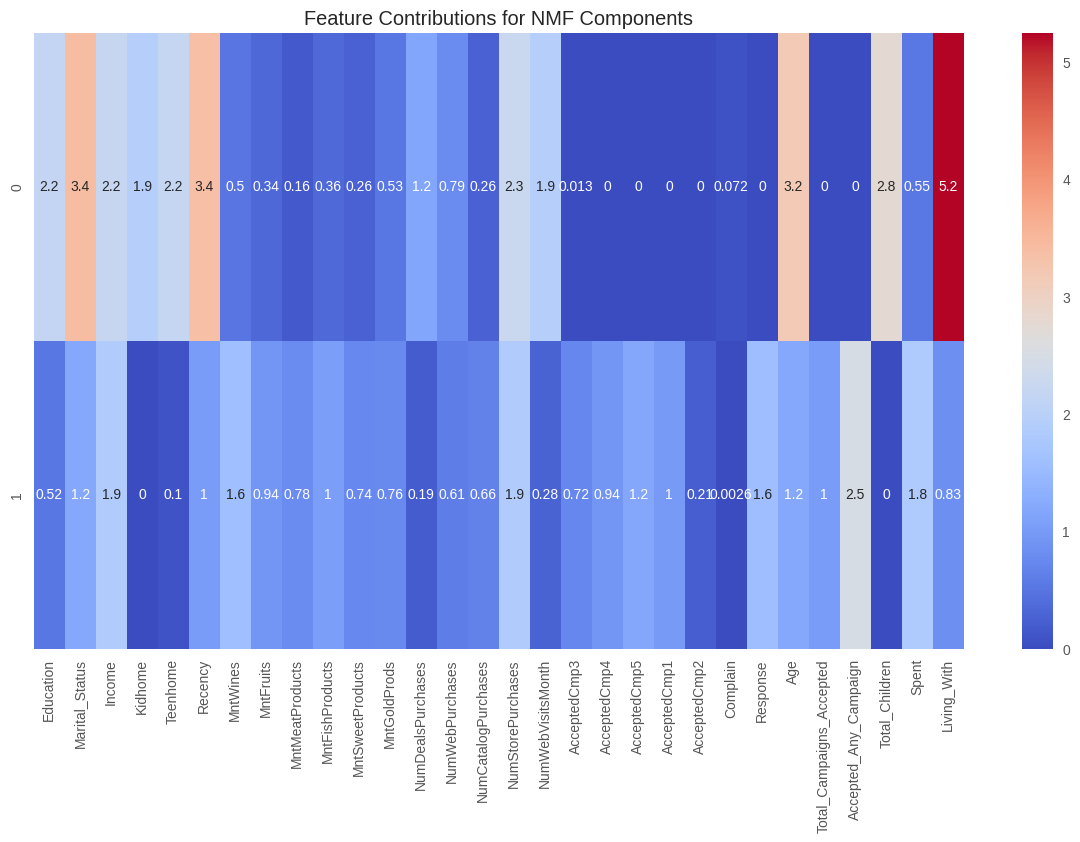

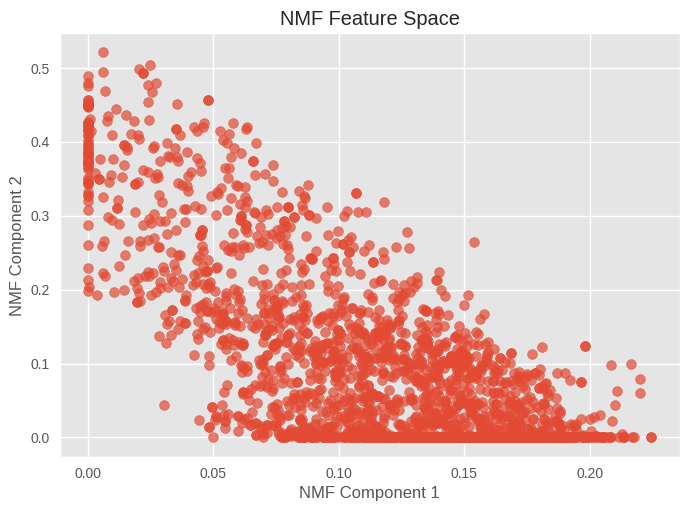

In [111]:
plt.figure(figsize=(15, 8))
sns.heatmap(feature_contributions, annot=True, cmap='coolwarm')
plt.title('Feature Contributions for NMF Components')
plt.show()


plt.scatter(W[:, 0], W[:, 1], alpha=0.7)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.title('NMF Feature Space')
plt.show()


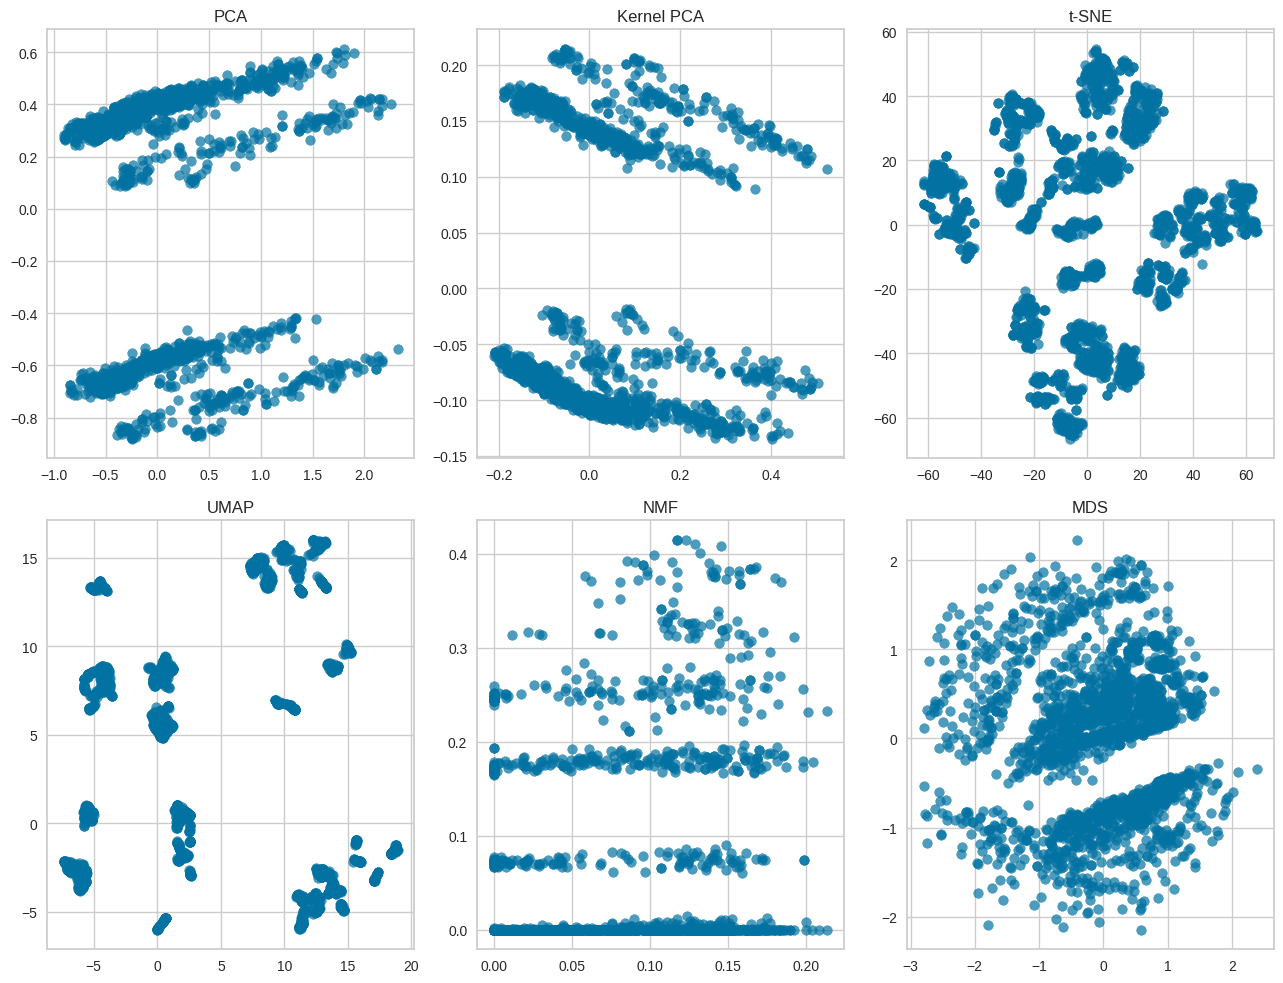

In [77]:
methods = ['PCA', 'Kernel PCA', 't-SNE', 'UMAP', 'NMF', 'MDS']
reduced_data = [X_pca, kpca_data, tsne_data, umap_data, W, mds_data]

plt.figure(figsize=(13, 10))
for i, data in enumerate(reduced_data):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
    plt.title(methods[i])
plt.tight_layout()
plt.show()


In [84]:
results = []
for data, method in zip(reduced_data, methods):
    kmeans = KMeans(n_clusters=7, random_state=42)
    labels = kmeans.fit_predict(data)

    silhouette = silhouette_score(data, labels)
    db_index = davies_bouldin_score(data, labels)

    results.append({'Method': method, 'Silhouette Score': silhouette, 'Davies-Bouldin Index': db_index})

results_df = pd.DataFrame(results)
print(results_df)


       Method  Silhouette Score  Davies-Bouldin Index
0         PCA          0.597109              0.546102
1  Kernel PCA          0.598554              0.543924
2       t-SNE          0.483658              0.773674
3        UMAP          0.683834              0.418941
4         NMF          0.502274              0.728636
5         MDS          0.454040              0.695876


In [80]:
runtimes = []
for method, func in zip(methods, [pca, kpca, tsne, umap.UMAP(n_components=2), nmf, mds]):
    start = time.time()
    func.fit_transform(X_scaled)
    end = time.time()
    runtimes.append({'Method': method, 'Runtime (s)': end - start})

runtimes_df = pd.DataFrame(runtimes)
print(runtimes_df)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


       Method  Runtime (s)
0         PCA     0.007334
1  Kernel PCA     1.408748
2       t-SNE    18.343683
3        UMAP     5.784664
4         NMF     0.169327
5         MDS   181.765472


In [81]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(W)


df['Cluster_NMF'] = labels

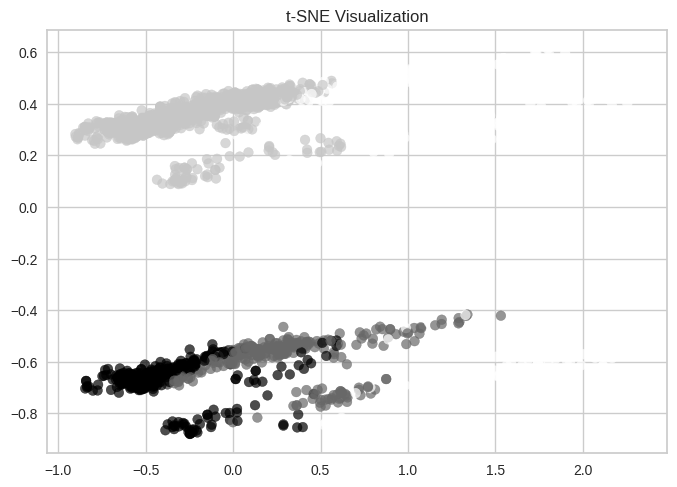

In [83]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.7)
plt.title('t-SNE Visualization')
plt.show()


In [126]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(W)
df['Cluster_GMM'] = gmm_labels

In [127]:
cluster_summary_NMF = df.groupby('Cluster_GMM').mean()
print(cluster_summary_NMF)


             Education  Marital_Status        Income   Kidhome  Teenhome  \
Cluster_GMM                                                                
0             0.557692        3.682692  72924.663462  0.079327  0.254808   
1             0.706490        3.703540  33564.570796  0.892330  0.539823   
2             0.569757        3.755176  54665.418542  0.303330  0.580558   

               Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster_GMM                                                      
0            46.026442  708.617788  53.283654       393.576923   
1            50.868732   36.525074   3.615044        18.153392   
2            48.990999  320.021602  30.244824       169.646265   

             MntFishProducts  ...  Response        Age  \
Cluster_GMM                   ...                        
0                  77.927885  ...  0.521635  44.942308   
1                   5.469027  ...  0.000000  41.737463   
2                  42.418542  ...  0.104410  45.272727  

Some experiments

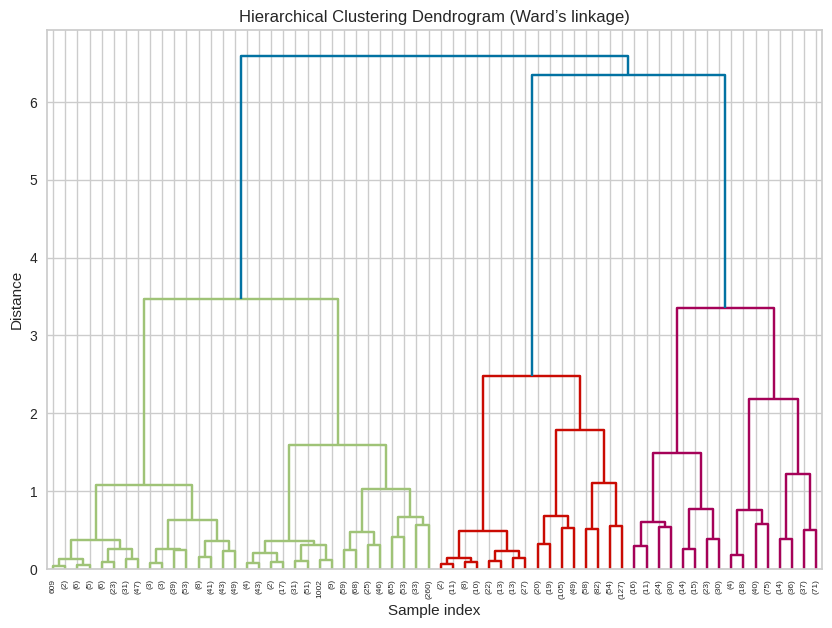

In [26]:

linked = linkage(W, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Ward’s linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

num_clusters = 4
hierarchical_labels = fcluster(linked, num_clusters, criterion='maxclust')


In [27]:
spectral_model = SpectralClustering(n_clusters=num_clusters, affinity='rbf', random_state=42)
spectral_labels = spectral_model.fit_predict(W)


In [28]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_label = kmeans.fit_predict(W)


In [29]:
hierarchical_silhouette = silhouette_score(W, hierarchical_labels)
spectral_silhouette = silhouette_score(W, spectral_labels)
kmeans_silhouette = silhouette_score(W, kmeans_label)

print("Silhouette Score - Hierarchical Clustering:", hierarchical_silhouette)
print("Silhouette Score - Spectral Clustering:", spectral_silhouette)
print("Silhouette Score - kmeans Clustering:", kmeans_silhouette)

Silhouette Score - Hierarchical Clustering: 0.4290800203548754
Silhouette Score - Spectral Clustering: 0.43866982242166985
Silhouette Score - kmeans Clustering: 0.4614261326084106


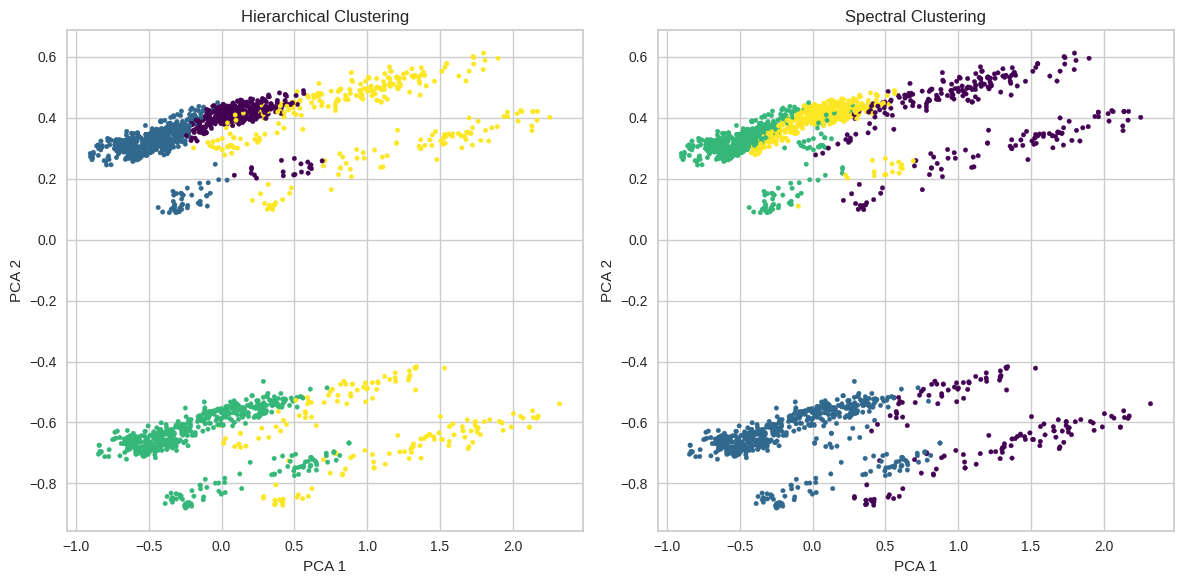

In [30]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=10)
plt.title('Hierarchical Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=spectral_labels, cmap='viridis', s=10)
plt.title('Spectral Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


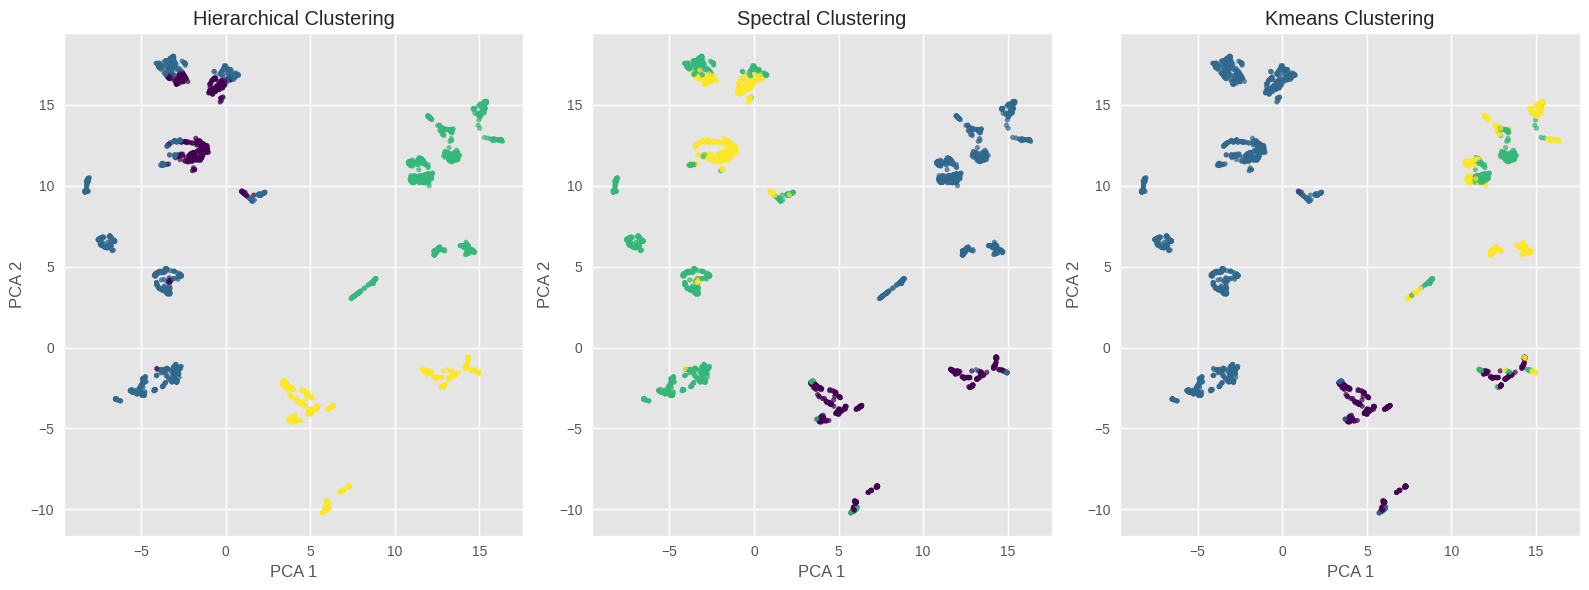

In [59]:
umap_data = umap.UMAP(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.7, c=hierarchical_labels, cmap='viridis', s=10)
plt.title('Hierarchical Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 2)
plt.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.7, c=spectral_labels, cmap='viridis', s=10)
plt.title('Spectral Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 3)
plt.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.7, c=kmeans_label, cmap='viridis', s=10)
plt.title('Kmeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()
